# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   <li><b>Task 2: </b>For this task consider set-1 features. Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  Note: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os


import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#taking 50000 datapoints for both project and resource data, due to Memory issues
project_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Assignments_DonorsChoose_2018/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

Preprocessing of project_grade_category

In [0]:
project_grade = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in project_grade:
    # consider we have text like this:
    for j in i.split(' '): #    # split by spae
        j=j.replace('Grades','')# clean grades from the row
    grade_cat_list.append(j.strip())
    


project_data['grade_cat_list'] = grade_cat_list 
project_data.drop(['project_grade_category'], axis=1, inplace=True)


## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 18 columns]

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:02<00:00, 1752.94it/s]


In [0]:
# Merging preprocessed_essays in project_data

project_data['preprocessed_essays'] = preprocessed_essays

project_data.head(3)

Unnamed: 0  ...                                preprocessed_essays
0      160221  ...  my students english learners working english s...
1      140945  ...  our students arrive school eager learn they po...
2       21895  ...  true champions not always ones win guts by mia...

[3 rows x 19 columns]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:27<00:00, 1779.98it/s]


In [0]:
# Combining all the above stundents 
from tqdm import tqdm
cv_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    cv_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:13<00:00, 1777.57it/s]


In [0]:
# Combining all the above stundents 
from tqdm import tqdm
test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    test_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:20<00:00, 1757.77it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['project_title'].values[2000])
print(sent)
print("="*50)

Steady Stools for Active Learning


In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Steady Stools for Active Learning


In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Steady Stools for Active Learning


In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 41869.85it/s]


In [0]:
# Merging preprocessed_titles in project_data

project_data['preprocessed_titles'] = preprocessed_titles

project_data.head(3)

Unnamed: 0  ...                              preprocessed_titles
0      160221  ...        educational support english learners home
1      140945  ...                 wanted projector hungry learners
2       21895  ...  soccer equipment awesome middle school students

[3 rows x 20 columns]

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    train_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:01<00:00, 42143.57it/s]


In [0]:
# Combining all the above stundents 
from tqdm import tqdm
cv_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    cv_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 41875.10it/s]


In [0]:
# Combining all the above stundents 
from tqdm import tqdm
test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    test_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 40129.09it/s]


In [0]:
preprocessed_titles[2000]

'steady stools active learning'

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'grade_cat_list', 'essay',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

### 1.5.1 Vectorizing Categorical data

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
#print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

cat_features = vectorizer.get_feature_names()
print(cat_features)
print(len(cat_features))

Shape of matrix after one hot encodig  (109248, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
9


In [0]:
# we use count vectorizer to convert the values into one 
vectorizer1 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer1.fit_transform(project_data['clean_subcategories'].values)
#print(vectorizer1.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

sub_cat_features=vectorizer1.get_feature_names()
print(sub_cat_features)
print(len(sub_cat_features))

Shape of matrix after one hot encodig  (109248, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
30


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer2.fit_transform(project_data['school_state'].values)
#print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

state_features=vectorizer2.get_feature_names()
print(state_features)
print(len(state_features))

Shape of matrix after one hot encodig  (109248, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
51


In [0]:
project_data['teacher_prefix'].value_counts()
#df_new = df[df['ColumnName'].notnull()]

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(" ")
my_counter = Counter()
for word in project_data['teacher_prefix'].values.astype('str'):  #https://stackoverflow.com/questions/39116088/typeerror-in-countvectorizer-scikit-learn-expected-string-or-buffer
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer3 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer3.fit_transform(project_data['teacher_prefix'].values.astype('str'))    ##https://stackoverflow.com/questions/39116088/typeerror-in-countvectorizer-scikit-learn-expected-string-or-buffer
#print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

prefix_features=vectorizer3.get_feature_names()
print(prefix_features)
print(len(prefix_features))

Shape of matrix after one hot encodig  (109248, 5)
['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
5


In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['grade_cat_list'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer4 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer4.fit_transform(project_data['grade_cat_list'].values)
#print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

grade_features=vectorizer4.get_feature_names()
print(grade_features)
print(len(grade_features))

Shape of matrix after one hot encodig  (109248, 4)
['9-12', '6-8', '3-5', 'PreK-2']
4


### 1.5.2 Vectorizing Text data

#### 1.5.2.2 TFIDF vectorizer

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer5 = TfidfVectorizer(min_df=10,ngram_range=(2,2),max_features=5000)
text_tfidf = vectorizer5.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

essays_features_tf=vectorizer5.get_feature_names()
#print(essays_features)
print(len(essays_features_tf))

Shape of matrix after one hot encodig  (109248, 5000)
5000


In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer6 = TfidfVectorizer(min_df=10,ngram_range=(2,2),max_features=5000)
title_tfidf = vectorizer6.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

#titles_features_tf=vectorizer6.get_feature_names()
#print(essays_features)
#print(len(titles_features_tf))

Shape of matrix after one hot encodig  (109248, 3247)
3247


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Assignments_DonorsChoose_2018/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average tfidf Word2Vec
# compute average tfidf Word2Vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109248/109248 [03:43<00:00, 488.92it/s]

109248
300


In [0]:
# average tfidf Word2Vec
# compute average tfidf Word2Vec for each review.
train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors.append(vector)

print(len(train_tfidf_w2v_vectors))
print(len(train_tfidf_w2v_vectors[0]))

100%|██████████| 49041/49041 [01:29<00:00, 544.93it/s]

49041
300


In [0]:
# average tfidf Word2Vec
# compute average tfidf Word2Vec for each review.
test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors.append(vector)

print(len(test_tfidf_w2v_vectors))
print(len(test_tfidf_w2v_vectors[0]))

100%|██████████| 36052/36052 [01:07<00:00, 534.89it/s]

36052
300


In [0]:
# average tfidf Word2Vec
# compute average tfidf Word2Vec for each review.
cv_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_vectors.append(vector)

print(len(cv_tfidf_w2v_vectors))
print(len(cv_tfidf_w2v_vectors[0]))

100%|██████████| 24155/24155 [00:44<00:00, 537.41it/s]

24155
300


In [0]:
# Similarly you can vectorize for title also

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors1.append(vector)

print(len(tfidf_w2v_vectors1))
print(len(tfidf_w2v_vectors1[0]))

100%|██████████| 109248/109248 [00:03<00:00, 30030.40it/s]

109248
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_vectors1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors1.append(vector)

print(len(train_tfidf_w2v_vectors1))
print(len(train_tfidf_w2v_vectors1[0]))

100%|██████████| 49041/49041 [00:01<00:00, 31250.85it/s]

49041
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
test_tfidf_w2v_vectors1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors1.append(vector)

print(len(test_tfidf_w2v_vectors1))
print(len(test_tfidf_w2v_vectors1[0]))

100%|██████████| 36052/36052 [00:01<00:00, 29392.39it/s]

36052
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_vectors1 = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(cv_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_vectors1.append(vector)

print(len(cv_tfidf_w2v_vectors1))
print(len(cv_tfidf_w2v_vectors1[0]))

100%|██████████| 24155/24155 [00:00<00:00, 33260.73it/s]

24155
300


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [126]:
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

Unnamed: 0       id  ...  price quantity
0      160221  p253737  ...  154.6       23

[1 rows x 21 columns]

In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
#Since we have merged our project_data and Price_data in to single entity of price
#it is also mandatory to merge it for Train , test data
X_train = pd.merge(X_train, price_data, on = "id", how = "left")
#print(x_train.columns)
X_test = pd.merge(X_test, price_data, on = "id", how = "left")
X_cv = pd.merge(X_cv, price_data, on = "id", how = "left")

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))
tr_price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
te_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 298.1193425966608, Standard deviation : 367.49634838483496


In [0]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))
tr_quantity_standardized = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
cv_quantity_standardized = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
te_quantity_standardized = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

Mean : 16.965610354422964, Standard deviation : 26.182821919093175


In [0]:
quantity_standardized

array([[ 0.23047132],
       [-0.60977424],
       [ 0.19227834],
       ...,
       [-0.4951953 ],
       [-0.03687954],
       [-0.45700232]])

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

number_projects_scalar = StandardScaler()
number_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {number_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(number_projects_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
number_projects_standardized = number_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
tr_number_projects_standardized = number_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
cv_number_projects_standardized = number_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
te_number_projects_standardized = number_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.153165275336848, Standard deviation : 27.77702641477403


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Encoding - Categorical

In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cl_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cl_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cl_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cl_categories_ohe.shape, y_train.shape)
print(X_cv_cl_categories_ohe.shape, y_cv.shape)
print(X_test_cl_categories_ohe.shape, y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cl_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_cl_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_cl_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_cl_subcategories_ohe.shape, y_train.shape)
print(X_cv_cl_subcategories_ohe.shape, y_cv.shape)
print(X_test_cl_subcategories_ohe.shape, y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values.astype('U')) # fit has to happen only on train data
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_teacher_prefix_ohe.shape, y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer()
vectorizer.fit(X_train['grade_cat_list'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['grade_cat_list'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['grade_cat_list'].values)
X_test_grade_ohe = vectorizer.transform(X_test['grade_cat_list'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 2) (49041,)
(24155, 2) (24155,)
(36052, 2) (36052,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


# Text - TfIdf

In [0]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(ngram_range=(2,2), min_df=10, max_features=5000)
vectorizer.fit(train_preprocessed_essays) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tf = vectorizer.transform(train_preprocessed_essays)
X_cv_essay_tf = vectorizer.transform(cv_preprocessed_essays)
X_test_essay_tf = vectorizer.transform(test_preprocessed_essays)



print("After vectorizations")
print(X_train_essay_tf.shape, y_train.shape)
print(X_cv_essay_tf.shape, y_cv.shape)
print(X_test_essay_tf.shape, y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


In [203]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer1 = TfidfVectorizer(min_df=10, ngram_range=(2,2), max_features=5000)
vectorizer1.fit(train_preprocessed_titles) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tf = vectorizer1.transform(train_preprocessed_titles)
X_cv_title_tf = vectorizer1.transform(cv_preprocessed_titles)
X_test_title_tf = vectorizer1.transform(test_preprocessed_titles)

titles_features_tf=vectorizer1.get_feature_names()

print("After vectorizations")
print(X_train_title_tf.shape, y_train.shape)
print(X_cv_title_tf.shape, y_cv.shape)
print(X_test_title_tf.shape, y_test.shape)
print("="*100)
print(len(titles_features_tf))


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")


(49041, 21) (49041,)
(24155, 21) (24155,)
(36052, 23) (36052,)
After vectorizations
(49041, 1234) (49041,)
(24155, 1234) (24155,)
(36052, 1234) (36052,)
1234
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


# Text - TfIdf Weighted W2vec

In [0]:
#https://stackoverflow.com/questions/21015674/list-object-has-no-attribute-shape
#List to Numpy array
#for Essays

X_train_es_tfidf_w2v = np.array(train_tfidf_w2v_vectors)
X_cv_es_tfidf_w2v = np.array(cv_tfidf_w2v_vectors)
X_test_es_tfidf_w2v = np.array(test_tfidf_w2v_vectors)

#similarly, we are doing it for titles

X_train_title_tfidf_w2v = np.array(train_tfidf_w2v_vectors1)
X_cv_title_tfidf_w2v = np.array(cv_tfidf_w2v_vectors1)
X_test_title_tfidf_w2v = np.array(test_tfidf_w2v_vectors1)

In [0]:
#For Essays - TfIdf weighted W2vec
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

print("After vectorizations")
print(X_train_es_tfidf_w2v.shape, y_train.shape)
print(X_cv_es_tfidf_w2v.shape, y_cv.shape)
print(X_test_es_tfidf_w2v.shape, y_test.shape)
print("="*100)

(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 300) (49041,)
(24155, 300) (24155,)
(36052, 300) (36052,)


In [0]:
#For Titles - TfIdf Weighted W2Vec
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

print("After vectorizations")
print(X_train_title_tfidf_w2v.shape, y_train.shape)
print(X_cv_title_tfidf_w2v.shape, y_cv.shape)
print(X_test_title_tfidf_w2v.shape, y_test.shape)
print("="*100)

(49041, 20) (49041,)
(24155, 20) (24155,)
(36052, 20) (36052,)
After vectorizations
(49041, 300) (49041,)
(24155, 300) (24155,)
(36052, 300) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Concatinate all the features

In [0]:
#TfIdf

In [215]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_tf_train = hstack((X_train_essay_tf, X_train_title_tf, tr_price_standardized, tr_quantity_standardized, X_train_cl_categories_ohe,
                     X_train_cl_subcategories_ohe, X_train_school_state_ohe, X_train_teacher_prefix_ohe, X_train_grade_ohe))


print(X_tf_train.shape, y_train.shape)

(49041, 6334) (49041,)


In [207]:
X_tf_cv = hstack((X_cv_essay_tf, X_cv_title_tf, cv_price_standardized, cv_quantity_standardized, X_cv_cl_categories_ohe,
                     X_cv_cl_subcategories_ohe, X_cv_school_state_ohe, X_cv_teacher_prefix_ohe, X_cv_grade_ohe))

print(X_tf_cv.shape, y_cv.shape)

(24155, 6334) (24155,)


In [208]:
X_tf_test = hstack((X_test_essay_tf, X_test_title_tf, te_price_standardized, te_quantity_standardized, X_test_cl_categories_ohe,
                     X_test_cl_subcategories_ohe, X_test_school_state_ohe, X_test_teacher_prefix_ohe, X_test_grade_ohe))

print(X_tf_test.shape, y_test.shape)

(36052, 6334) (36052,)


In [0]:
#TfIdf weighted W2V

In [104]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx
X_tf_w2v_train = hstack((X_train_es_tfidf_w2v, X_train_title_tfidf_w2v, tr_price_standardized, tr_quantity_standardized, X_train_cl_categories_ohe,
                     X_train_cl_subcategories_ohe, X_train_school_state_ohe, X_train_teacher_prefix_ohe, X_train_grade_ohe))


print(X_tf_w2v_train.shape, y_train.shape)

(49041, 700) (49041,)


In [106]:
X_tf_w2v_cv = hstack((X_cv_es_tfidf_w2v, X_cv_title_tfidf_w2v, cv_price_standardized, cv_quantity_standardized, X_cv_cl_categories_ohe,
                     X_cv_cl_subcategories_ohe, X_cv_school_state_ohe, X_cv_teacher_prefix_ohe, X_cv_grade_ohe))

print(X_avg_w2v_cv.shape, y_cv.shape)

(24155, 700) (24155,)


In [107]:
X_tf_w2v_test = hstack((X_test_es_tfidf_w2v, X_test_title_tfidf_w2v, te_price_standardized, te_quantity_standardized, X_test_cl_categories_ohe,
                     X_test_cl_subcategories_ohe, X_test_school_state_ohe, X_test_teacher_prefix_ohe, X_test_grade_ohe))

print(X_avg_w2v_test.shape, y_test.shape)

(36052, 700) (36052,)


# Set1 - TfIdf

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters1={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 
             'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf_tree = DecisionTreeClassifier(random_state=11,class_weight='balanced')

clf=GridSearchCV(clf_tree ,parameters1, scoring="roc_auc", cv=5, return_train_score=True)
clf.fit(X_tf_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=11,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ma

In [0]:
a=clf.best_params_['max_depth']
p= clf.best_params_['min_samples_split']
print(clf.best_score_)
print(a)
print(p)

0.6497223216657874
10
500


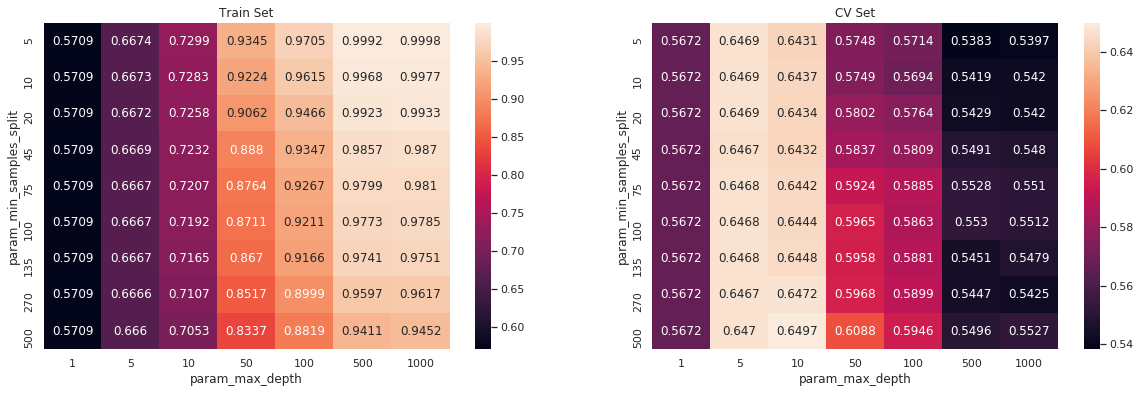

In [0]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

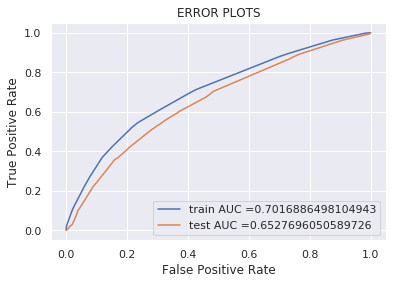

In [0]:
# Train new model
DT_tfidf = DecisionTreeClassifier(max_depth=a, min_samples_split=p, class_weight='balanced')
DT_tfidf.fit(X_tf_train,y_train)

#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = DT_tfidf.predict_proba(X_tf_train) [:,1]
y_test_pred1 = DT_tfidf.predict_proba(X_tf_test) [:,1]

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)
plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Confusin Matrix On train


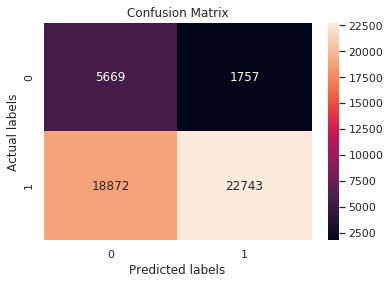

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Train dataset - COnfusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Confusin Matrix On train")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, DT_tfidf.predict(X_tf_train)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');

Confusin Matrix On test


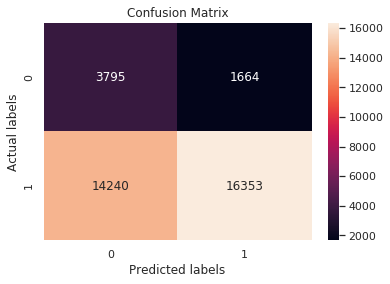

In [0]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Train dataset - COnfusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Confusin Matrix On test")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, DT_tfidf.predict(X_tf_test)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');

Extracting False positives

In [140]:
# Get FP points
pred = DT_tfidf.predict(X_tf_test)
actual=y_test
print(pred.shape)
print(actual.shape)

(36052,)
(36052,)


In [141]:
X_test_wc=pd.DataFrame(X_test)

print(X_test_wc.shape)

(36052, 23)


In [0]:
X_test_wc["pred"]=pred
X_test_wc["actual"]=actual

In [143]:
X_test_wc.head(2)

Unnamed: 0       id  ... pred actual
102952       92661  p009851  ...    1      0
56473        42874  p085351  ...    1      1

[2 rows x 23 columns]

In [144]:
X_fp = (X_test_wc["actual"]==0)
Y_fp = (X_test_wc["pred"]==1)
FP=X_test_wc[X_fp&Y_fp]
FP.head(2)

Unnamed: 0       id  ... pred actual
102952       92661  p009851  ...    1      0
19348        85551  p059921  ...    1      0

[2 rows x 23 columns]

Plot WordCloud on preprocessed_essays of FP points

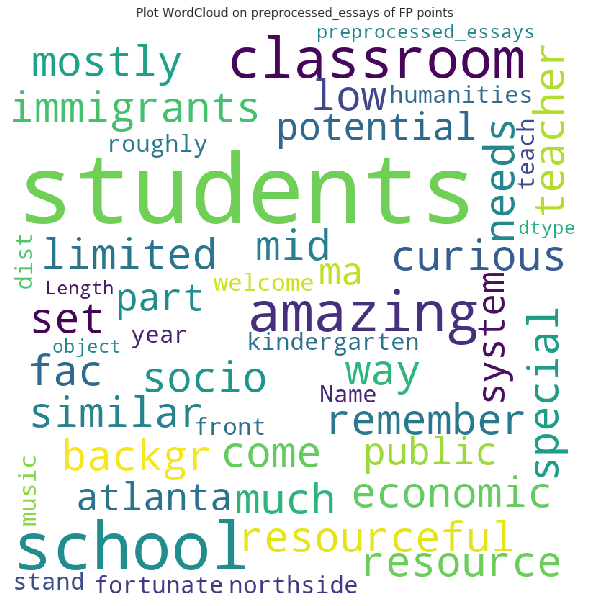

In [145]:
from wordcloud import WordCloud
word=str(FP["preprocessed_essays"])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(word) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Plot WordCloud on preprocessed_essays of FP points")   
plt.show()

Plot WordCloud on preprocessed_titles of FP points

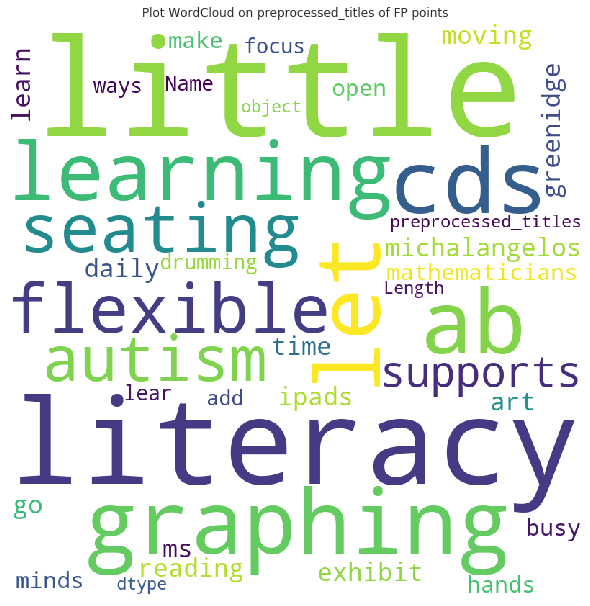

In [146]:
from wordcloud import WordCloud
word=str(FP["preprocessed_titles"])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(word) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Plot WordCloud on preprocessed_titles of FP points")  
plt.show()

BOX PLOT on PRICE of FP points

Text(0.5, 1.0, 'BOX PLOT on PRICE of FP points')

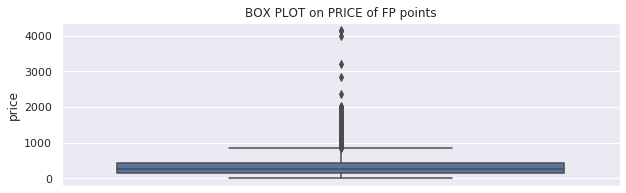

In [147]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.boxplot(FP["price"],orient="v")
plt.title("BOX PLOT on PRICE of FP points")

PDF of teacher_number_of_previously_posted_projects of FP points

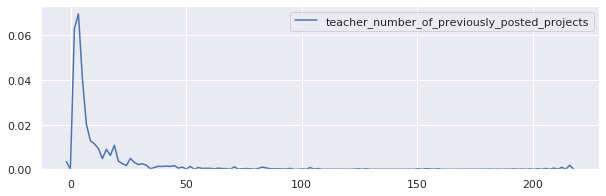

In [148]:
plt.figure(figsize=(10,3))
sns.kdeplot(FP["teacher_number_of_previously_posted_projects"],label="teacher_number_of_previously_posted_projects", bw=0.6)

plt.legend()
plt.show()

# Set2 - TfIdf avg W2Vec

In [83]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters2={'max_depth': [1, 5, 10, 50, 100, 500, 1000], 
             'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}

clf_tree = DecisionTreeClassifier(random_state=11,class_weight='balanced')

clf1=GridSearchCV(clf_tree ,parameters2, scoring="roc_auc", cv=5, return_train_score=True)
clf1.fit(X_tf_w2v_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=11,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'ma

In [84]:
a1=clf1.best_params_['max_depth']
p1= clf1.best_params_['min_samples_split']
print(clf1.best_score_)
print(a1)
print(p1)

0.6599429777092334
5
270


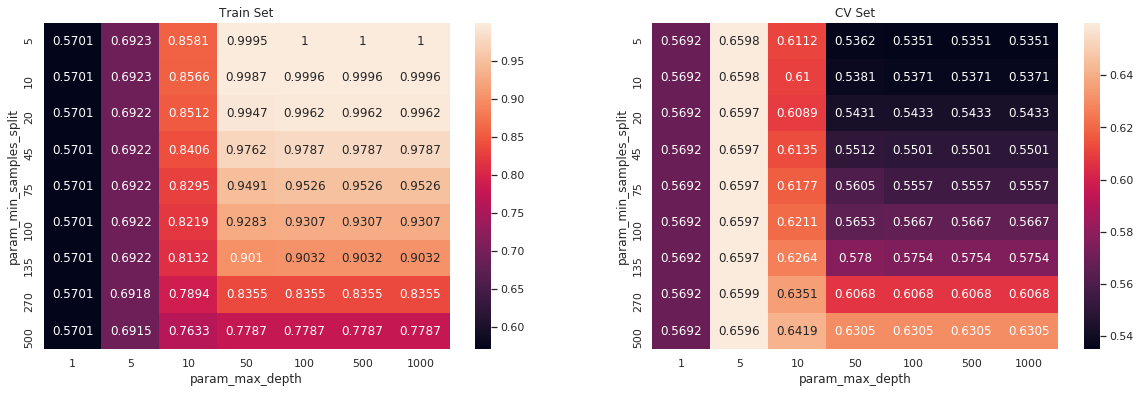

In [85]:
#https://towardsdatascience.com/using-3d-visualizations-to-tune-hyperparameters-of-ml-models-with-python-ba2885eab2e9
#https://github.com/xoelop/Medium-posts/blob/master/3d%20cross%20validation/ML%206%20-%20Gridsearch%20visulizations%20.ipynb
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [92]:
# Train new model
DT_tfidf1 = DecisionTreeClassifier(max_depth=a1, min_samples_split=p1, class_weight='balanced')
DT_tfidf1.fit(X_tf_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=270,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

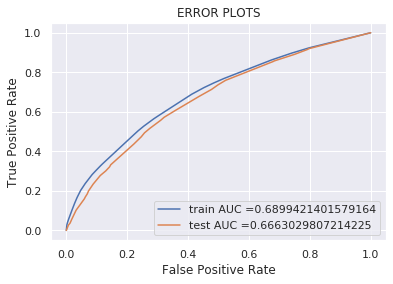

In [109]:
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred = clf1.predict_proba(X_tf_w2v_train) [:,1]
y_test_pred = clf1.predict_proba(X_tf_w2v_test) [:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

Confusin Matrix On train


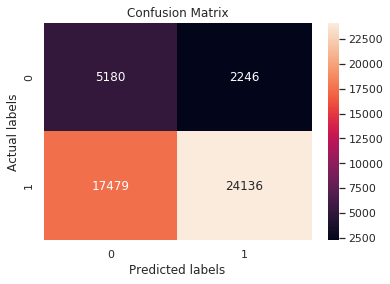

In [110]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Train dataset - COnfusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Confusin Matrix On train")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, clf1.predict(X_tf_w2v_train)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');

Confusin Matrix On test


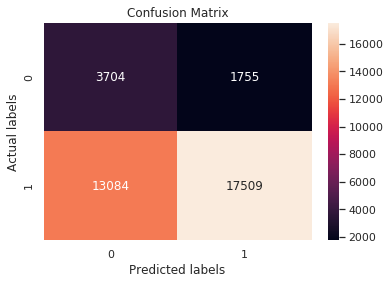

In [112]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Train dataset - COnfusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Confusin Matrix On test")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, clf1.predict(X_tf_w2v_test)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');

<h2>Extracting False positives</h2>

In [0]:
#https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb

In [128]:
# Get FP points
pred = clf1.predict(X_tf_w2v_test)
actual=y_test
print(pred.shape)
print(actual.shape)

(36052,)
(36052,)


In [129]:
X_test_wc=pd.DataFrame(X_test)

print(X_test_wc.shape)

(36052, 21)


In [0]:
X_test_wc["pred"]=pred
X_test_wc["actual"]=actual

In [131]:
X_test_wc.head(2)

Unnamed: 0       id  ... pred actual
102952       92661  p009851  ...    1      0
56473        42874  p085351  ...    0      1

[2 rows x 23 columns]

In [132]:
X_fp = (X_test_wc["actual"]==0)
Y_fp = (X_test_wc["pred"]==1)
FP=X_test_wc[X_fp&Y_fp]
FP.head(2)

Unnamed: 0       id  ... pred actual
102952       92661  p009851  ...    1      0
19348        85551  p059921  ...    1      0

[2 rows x 23 columns]

# Plot WordCloud on preprocessed_essays of FP points

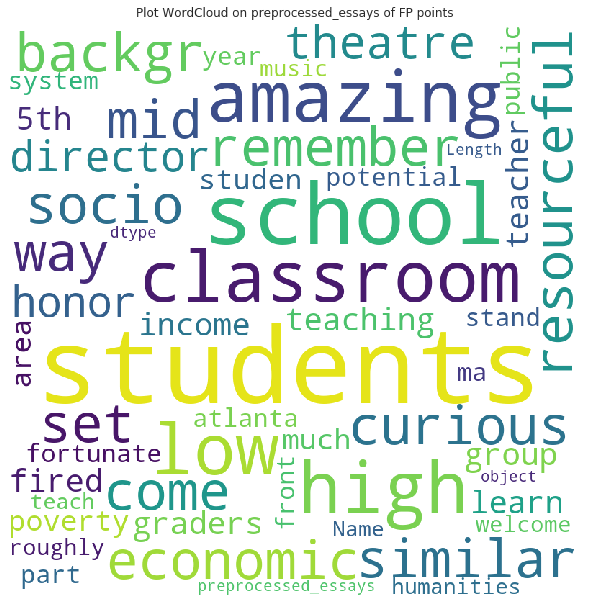

In [133]:
from wordcloud import WordCloud
word=str(FP["preprocessed_essays"])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(word) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Plot WordCloud on preprocessed_essays of FP points")   
plt.show()

<h2>Plot WordCloud on preprocessed_titles of FP points </h2>

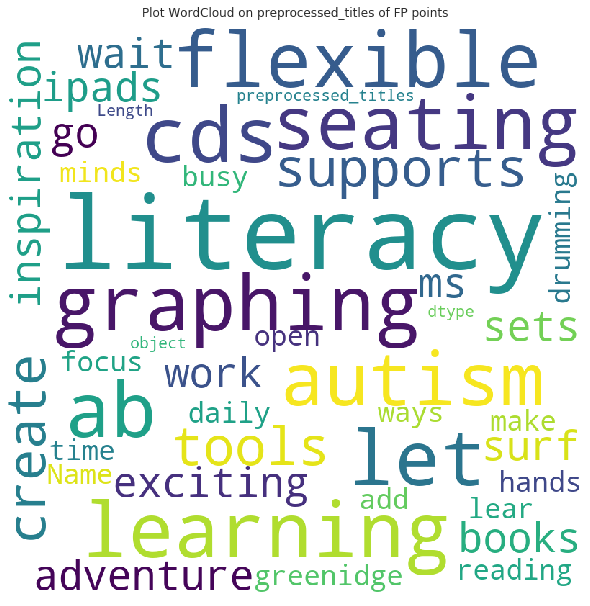

In [134]:
from wordcloud import WordCloud
word=str(FP["preprocessed_titles"])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(word) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Plot WordCloud on preprocessed_titles of FP points")  
plt.show()

<h2>BOX PLOT on PRICE of FP points</h2>

Text(0.5, 1.0, 'BOX PLOT on PRICE of FP points')

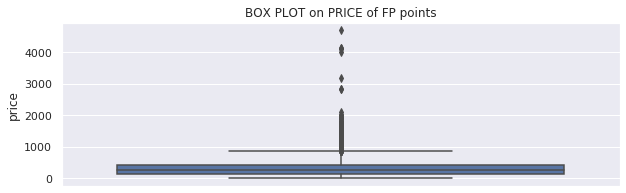

In [135]:
import seaborn as sns
plt.figure(figsize=(10,3))
sns.boxplot(FP["price"],orient="v")
plt.title("BOX PLOT on PRICE of FP points")

<h2>PDF of teacher_number_of_previously_posted_projects of FP points</h2>

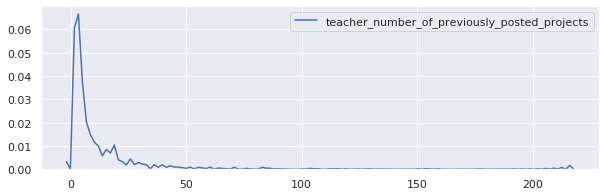

In [136]:
plt.figure(figsize=(10,3))
sns.kdeplot(FP["teacher_number_of_previously_posted_projects"],label="teacher_number_of_previously_posted_projects", bw=0.6)

plt.legend()
plt.show()

<h2>1.6 Getting top features using `feature_importances_`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2> Task 2 </h2>

In [0]:
set1_features = cat_features+sub_cat_features+state_features+prefix_features+grade_features+essays_features_tf+titles_features_tf
set1_features.append("price")

In [219]:
print(len(set1_features))

6334


In [0]:
set2 = hstack((categories_one_hot,sub_categories_one_hot,prefix_one_hot,state_one_hot,grade_one_hot,text_tfidf,title_tfidf,price_standardized,quantity_standardized,number_ppp_standardized))

In [220]:
dt_1 =DecisionTreeClassifier(max_depth = 10, min_samples_split= 500)
dt_1.fit(X_tf_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [222]:
#picking Top features using "feature_importances_"
top_features=dt_1.feature_importances_
top_features.shape

(6334,)

In [0]:
df_features = pd.DataFrame(data=set1_features,columns=["Feature Name"])
df_features["Feature Value"] = top_features

In [224]:
df_features = df_features.sort_values(by = ["Feature Value"],ascending=False)
df_features.head()

Feature Name  Feature Value
1438    focus better       0.116747
5475     get wiggles       0.113079
1676         grow my       0.111897
3935  students grade       0.110576
4653      unique way       0.093587

In [0]:
# selecting top 5k features
df_features = df_features[:5000]

In [0]:
#since, we have already picked top 5k features, our next step is to build a model on top of this.
#before, that we need to rearrange the indices

In [0]:
# getting the list of indices of top  features
index_list = df_features.index.tolist()

In [232]:
# converting to csr to access elements
X_tf_train = X_tf_train.tocsr()
X_tf_test = X_tf_test.tocsr()
print(X_tf_train.shape)
print(X_tf_test.shape)

(49041, 6334)
(36052, 6334)


In [0]:
#Concatinating 5k features
# Extracting specific columns in numpy array
# https://stackoverflow.com/questions/8386675/extracting-specific-columns-in-numpy-array
X_tf_tr = X_tf_train[:,index_list]
X_tf_te = X_tf_test[:,index_list]

In [234]:
print(X_tf_tr.shape)
print(X_tf_te.shape)

(49041, 5000)
(36052, 5000)


<h2> Model : Logistic Regression </h2>

In [239]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

parameters1={'alpha': [10**x for x in range(-4,3)] ,
             'penalty' : ['l1','l2']}

clf_LR = SGDClassifier(loss = 'log',random_state=11,class_weight='balanced')

clf8=GridSearchCV(clf_LR ,param_grid = parameters1, scoring="roc_auc", cv=10, return_train_score=True)
clf8.fit(X_tf_tr,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=11,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=

In [240]:
a8=clf8.best_params_['alpha']
p8= clf8.best_params_['penalty']
print(clf8.best_score_)
print(a8)
print(p8)

0.501018195198532
0.0001
l1


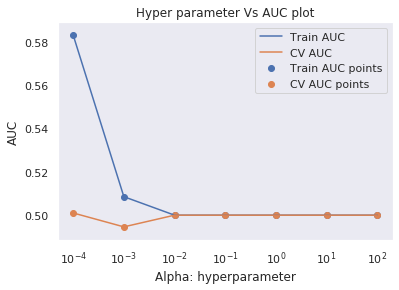

In [241]:
train_auc= clf8.cv_results_['mean_train_score'][clf8.cv_results_['param_penalty']==p8]
train_auc_std= clf8.cv_results_['std_train_score'][clf8.cv_results_['param_penalty']==p8]
cv_auc = clf8.cv_results_['mean_test_score'][clf8.cv_results_['param_penalty']==p8] 
cv_auc_std= clf8.cv_results_['std_test_score'][clf8.cv_results_['param_penalty']==p8]

plt.plot(parameters1['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters1['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters1['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters1['alpha'], cv_auc, label='CV AUC points')

plt.xscale('log')# we take the log in the x axis
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

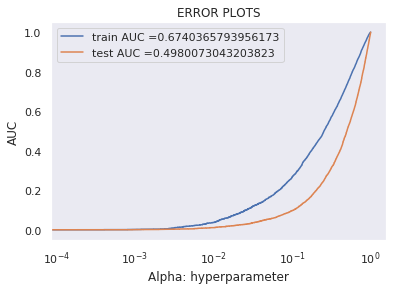

In [243]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


LR = SGDClassifier(loss = 'log',alpha=a8, class_weight='balanced') # n_jobs=-1 means parallel operations
LR.fit(X_tf_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(LR, X_tf_tr) #computing probability scores   
y_test_pred = batch_predict(LR, X_tf_te) #computing probability scores

#Since the thresholds are sorted from low to high values, 
#they are reversed upon returning them to ensure they correspond to both fpr and tpr, 
#which are sorted in reversed order during their calculation.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.xscale('log')# we take the log in the x axis
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

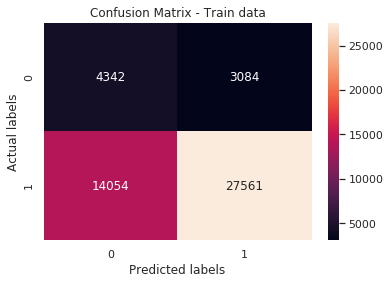

In [244]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Train dataset - COnfusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, LR.predict(X_tf_tr)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix - Train data');

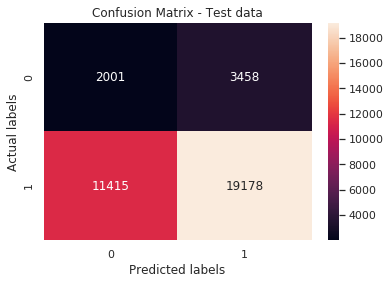

In [245]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Test dataset - confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, LR.predict(X_tf_te)), annot=True, ax = ax,fmt='g');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix - Test data');

<h1>2. Summary</h1>

In [0]:
from prettytable import PrettyTable
summary = PrettyTable()

In [0]:
summary.field_names = ["Vectorizer", "Model", "Alpha", "Max_depth ", " Min_sample_split ", "Test"]

In [0]:
summary.add_row(["TFIDF","DT","", "10", "500","0.652"])
summary.add_row(["TFIDF W2V","DT","", "5","270","0.666"])
summary.add_row(["TFIDF top 5k","LR","0.0001","","","0.498"])

In [5]:
print(summary)

+--------------+-------+--------+------------+--------------------+-------+
|  Vectorizer  | Model | Alpha  | Max_depth  |  Min_sample_split  |  Test |
+--------------+-------+--------+------------+--------------------+-------+
|    TFIDF     |   DT  |        |     10     |        500         | 0.652 |
|  TFIDF W2V   |   DT  |        |     5      |        270         | 0.666 |
| TFIDF top 5k |   LR  | 0.0001 |            |                    | 0.498 |
+--------------+-------+--------+------------+--------------------+-------+
